In [39]:
import pyodbc
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("InnerJoined_ResultsV2.csv")

columns = df.columns.tolist()

In [40]:
print(columns)

['zip_code', 'count', 'median']


In [ ]:
#sum of restaurants in zip or some sort of calc to numerically 

In [45]:
df.dtypes

zip_code    int64
count       int64
median      int64
dtype: object

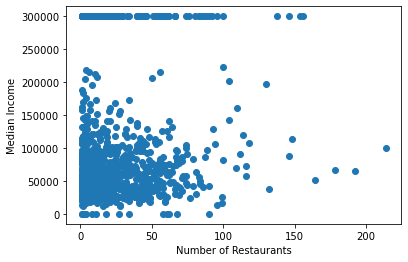

In [50]:
plt.scatter(df["count"], df["median"])

plt.xlabel('Number of Restaurants')
plt.ylabel('Median Income')
plt.show()

In [30]:
# Store the variable we'll be predicting on.
target = "count" #need to sum this in order to run

# Generate the training set.  Set random_state to be able to replicate results.
train = df.sample(frac=0.75, random_state=1)

# Select anything not in the training set and put it in the testing set.
test = df.loc[~df.index.isin(train.index)]

# Print the shapes of both sets.
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# Initialize the model class.
lin_model = LinearRegression()

# Fit the model to the training data.
lin_model.fit(train['median'], train[target])

Training set shape: (709, 3)
Testing set shape: (236, 3)
LinearRegression()


ValueError: Expected 2D array, got 1D array instead:
array=[ 25700 300000  33741 109102      0  20792 300000  65963 300000 300000
  37333 160021 195953  42556  34726  24844  17195  96936  74953  60080
  25809  81067  43316 300000  60854  68128  35427  51303  71650  42306
  62108  49395  55778  73636  50258  32606 124984  66462  36424  42273
  56695  57057  56347  24253  52331 124918  32372  78171  41008  69384
  76515  42479 215868  48829  41169  76038 300000  81177  89857  45319
 125217  82191  89265 300000 100153 300000  44404 100393  39645 300000
  67378  46446  73722  66090  31219  48248 300000  21049  58424  39848
  96094 142188 300000  36188  60742 113602  51028  25806 300000  37570
  44154  47458  43250 300000  34908  86533  37779  70785 300000  29894
  46592 300000      0      0  47315  63695  87129  27107 115256  46412
  69658  42954 300000  52547  83407 300000  70374  17598  44939 113550
  37138  57353  83140  62610      0  75940  32787 113437 300000  98295
  90121  71093  37583  38699  43196  97150  24459  99406 105723  36911
  11275  51561 300000  44734 300000  24891  76573  24284  80933 300000
 300000  36907  73287  39268  53192  66153  84399 142406  50724  54579
  23603  27978  63817  32427 300000  48077 300000  67771  21914  71688
 300000 300000 122111  29351 300000 218355  91021  22136  63551  58295
 115034  38649  46591  47327  91463 139452 159997 121631  39034 126166
  22997  32819  27995  62317  52069  12486 300000  90712 300000  58378
 300000  51352  40406 300000  33393 128666  49628  34421 300000  72104
  86968  44950  49704 105949 300000  46353  56738  37875  95157  17622
 300000  78572 300000  82641  30582  18277  25471  58114 148103  58056
  44231  86214 300000  35043  65824  55120  88279  47193  24986  36002
  28469 101584 300000  63316  24958 101106  43681  88102  63008 214767
 141709      0 120695  22560 300000  62081  81326  65615  61041  67012
  56057 132606  65585 300000 106122  97129 105372  52072  73063  34116
  47243 300000  78022  33670  65991  30873 136637  59038  38760 166684
  79518 300000  95962 104023 300000  16245  35231  39098  69051 300000
  52788  47046 300000  58519  49572  38568 300000  58725 300000      0
  73694  63124 300000  30036  45288  37893  22611  28666  96428 300000
  64980  41986      0 300000  69189 155572  32736  52769  62784  34071
  38672  51507  21900 300000 105824  54857 108348 151318 121721  93413
 300000  35556  44634  50570  21830  27521 133447  28460  89987 300000
  67793  41168 117987 169040 208338  48180 300000 300000  45627  50233
  22789  65622  56986  83180  66568  51439 300000  27852 300000  47364
  39263 300000 100253  57343  15956 140323  94342  15307 131522 300000
 300000  29713 300000  64599 300000  32107  74140  82207 300000  77070
  14210  34678 125048      0  98137  74232  44268 300000  76469  78658
  72674  99591 300000  59734  62611  58119 300000  51504  96442  13246
  36414  37446 300000  78914  59902  86387  91187 300000  90602  71494
  20333  26215  56852  76779 102799  54831 151229 300000 183484  76559
  65316  67319  70948  35793  37844  32526  52672  80384 300000 300000
 300000  54244 300000  87021  38931      0  70037  25997  48975 300000
  91469  63897  39393  39139  78790  86673  41819  43461  52856  93891
 300000  88389  35604 300000  58417  42408 108326  38578 197065  76209
  54369 300000  69869  21529 300000 300000  66598  34200 300000  37632
  48895 119299  71137  85634  48321  77622 300000  83574 157184  57020
  51711 300000  57335  65566  82248  38509  46396 300000  42981  19354
 300000 118625  36108  19175  48157 300000 300000  38962  28511  28255
  58788 300000  70607  46897  76695  50932  53561 131519 300000  52723
  94556  80713 300000  52917  20035  45215  46690  64342 300000  25640
  64058  56013      0 300000 201141  90293 204164  21613  94781  69242
  53793  20205  50774 104518 300000  30825  18303 300000  21983  52358
  57194 300000 300000 114508  80697 300000 300000  46977  41995 300000
      0  40262 300000  38893 156861  40160  73413  31748 300000  18241
 300000  17622  59094  43894  33511 300000  65670 140585 109613  65387
  80386  80183  86219  25753 134710 206024 300000  83502  20114  19340
 300000 142459  73947 121972  60024  93054  28638  94516  50224  55848
  76494  82929  43007 300000  27462  22542  88599 116815 116916      0
  79894 300000 300000 300000  25408  20605 300000  36506  42001  86659
  43209  50593 103192  96567  24711  58437  26723  43211  25864  58498
  74707 300000 300000  96033  45784 300000  74606 300000 105522  60661
 118247  69791 109819 112812 300000  77492 120625  43800  74564  55405
  36354 129437  63169 175447  29544 300000 300000  35461  83707  19694
  19836  76513 162335 141923  44427  63541  94742 300000  72539  76099
 300000 157006  21279  60332  55033  64156  43461 128764 105287  69616
  35830  47374 101768  65355 300000 145715  91692  75687 108998  72810
 300000  45189  64833  39156  21377 300000  59463  71788  37854  17957
  88319 104705 116703 104414  43771  26090  53244 102269  89224  35774
 300000  45629  28386  38960  41431  84934  56935  26736  31470].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.